In [13]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
surrogates = ['BNN', 'RF', 'GP', 'DE']
exp_dict = {'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
results_dict = {surrogate:copy.deepcopy(exp_dict) for surrogate in surrogates}
directory="./results_real_data/results_mnist"
for foldername in os.listdir(directory):
    folder = os.path.join(directory, foldername)
    if os.path.isdir(folder):
        for filename in os.listdir(folder):
            if filename.find("parameters") != -1:
                json_file = open(os.path.join(folder, filename))
                params = json.load(json_file)
            elif filename.find("metrics") != -1:
                json_file = open(os.path.join(folder, filename))
                metrics = json.load(json_file)
        if params['bo'] == True and params['acquisition']=="EI":
            results_dict[params['surrogate']]['inst_regret_test'].append(metrics['y_regret_test'])
            results_dict[params['surrogate']]['inst_regret_pool'].append(metrics['y_regret_pool'])
            results_dict[params['surrogate']]['tot_regret_test'].append(np.cumsum(metrics['y_regret_test']))
            results_dict[params['surrogate']]['tot_regret_pool'].append(np.cumsum(metrics['y_regret_pool']))
            results_dict[params['surrogate']]['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
            results_dict[params['surrogate']]['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
            results_dict[params['surrogate']]['sharpness'].append(metrics['mean_sharpness'])
            results_dict[params['surrogate']]['calibration_mse'].append(metrics['y_calibration_mse'])

In [14]:
column_names = {'surrogate':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for surrogate in surrogates:
    column_names['surrogate'].append(surrogate)
    column_names['inst_regret_test'].append(np.array(results_dict[surrogate]['inst_regret_test']).mean(axis=0)[-1])
    column_names['inst_regret_pool'].append(np.array(results_dict[surrogate]['inst_regret_pool']).mean(axis=0)[-1])
    column_names['tot_regret_test'].append(np.array(results_dict[surrogate]['tot_regret_test']).mean(axis=0)[-1])
    column_names['tot_regret_pool'].append(np.array(results_dict[surrogate]['tot_regret_pool']).mean(axis=0)[-1])
    column_names['calibration_mse'].append(np.array(results_dict[surrogate]['calibration_mse']).mean(axis=0)[-1])
    column_names['sharpness'].append(np.array(results_dict[surrogate]['sharpness']).mean(axis=0)[-1])
    column_names['x_opt_dist_test'].append(np.array(results_dict[surrogate]['x_opt_dist_test']).mean(axis=0)[-1])
    column_names['x_opt_dist_pool'].append(np.array(results_dict[surrogate]['x_opt_dist_pool']).mean(axis=0)[-1])

In [15]:
df = pd.DataFrame.from_dict(column_names)
display(df)

,surrogate,inst_regret_test,inst_regret_pool,tot_regret_test,tot_regret_pool,calibration_mse,sharpness,x_opt_dist_test,x_opt_dist_pool
0,BNN,0.077776,0.076023,7.855349,7.678342,0.070897,0.082350,2.379112,2.287373
1,RF,0.002111,0.000119,1.440757,1.258007,0.010766,-0.677659,1.915892,0.363764
2,GP,0.005231,0.003479,1.924739,1.747732,0.008575,-0.379879,1.700792,0.892353
3,DE,0.002111,0.000119,1.371771,1.188781,0.031632,0.012249,1.915892,0.363764


In [4]:
import json
import os
import numpy as np
import pandas as pd
import copy
surrogates = ['BNN', 'RF', 'GP', 'DE']
exp_dict = {'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
results_dict = {surrogate:copy.deepcopy(exp_dict) for surrogate in surrogates}
directory="./results_real_data/results_mnist"
for foldername in os.listdir(directory):
    folder = os.path.join(directory, foldername)
    if os.path.isdir(folder):
        for filename in os.listdir(folder):
            if filename.find("parameters") != -1:
                json_file = open(os.path.join(folder, filename))
                params = json.load(json_file)
            elif filename.find("metrics") != -1:
                json_file = open(os.path.join(folder, filename))
                metrics = json.load(json_file)
        if params['bo'] == True and params['acquisition'] != 'RS':
            results_dict[params['surrogate']]['inst_regret_test'].append(metrics['y_regret_test'])
            results_dict[params['surrogate']]['inst_regret_pool'].append(metrics['y_regret_pool'])
            results_dict[params['surrogate']]['tot_regret_test'].append(np.cumsum(metrics['y_regret_test']))
            results_dict[params['surrogate']]['tot_regret_pool'].append(np.cumsum(metrics['y_regret_pool']))
            results_dict[params['surrogate']]['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
            results_dict[params['surrogate']]['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
            results_dict[params['surrogate']]['calibration_mse'].append(metrics['y_calibration_mse'])

In [5]:
column_names = {'surrogate':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for surrogate in surrogates:
    column_names['surrogate'].append(surrogate)
    column_names['inst_regret_test'].append(np.array(results_dict[surrogate]['inst_regret_test']).mean(axis=0)[-1])
    column_names['inst_regret_pool'].append(np.array(results_dict[surrogate]['inst_regret_pool']).mean(axis=0)[-1])
    column_names['tot_regret_test'].append(np.array(results_dict[surrogate]['tot_regret_test']).mean(axis=0)[-1])
    column_names['tot_regret_pool'].append(np.array(results_dict[surrogate]['tot_regret_pool']).mean(axis=0)[-1])
    column_names['calibration_mse'].append(np.array(results_dict[surrogate]['calibration_mse']).mean(axis=0)[-1])
    column_names['sharpness'].append(np.array(results_dict[surrogate]['calibration_mse']).mean(axis=0)[-1])
    column_names['x_opt_dist_test'].append(np.array(results_dict[surrogate]['x_opt_dist_test']).mean(axis=0)[-1])
    column_names['x_opt_dist_pool'].append(np.array(results_dict[surrogate]['x_opt_dist_pool']).mean(axis=0)[-1])

In [6]:
df = pd.DataFrame.from_dict(column_names)
display(df)

,surrogate,inst_regret_test,inst_regret_pool,tot_regret_test,tot_regret_pool,calibration_mse,sharpness,x_opt_dist_test,x_opt_dist_pool
0,BNN,0.043067,0.041314,5.705066,5.528060,0.074766,0.074766,1.692949,1.942210
1,RF,0.009024,0.007192,1.956949,1.778028,0.007368,0.007368,2.135600,1.461835
2,GP,0.004946,0.003193,1.890339,1.713332,0.010138,0.010138,1.617271,1.099050
3,DE,0.004678,0.002766,1.603955,1.424236,0.027473,0.027473,1.848996,0.906883


In [166]:
import json
import os
import numpy as np
import pandas as pd
import copy
surrogates = ['BNN', 'RF', 'GP', 'DE']
acquisitions = ['EI', 'RS', 'UCB']
exp_dict = {'acquisition':[],'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
results_dict = {surrogate:{acquisition:copy.deepcopy(exp_dict) for acquisition in acquisitions} for surrogate in surrogates}
directory="./results_mnist"
for foldername in os.listdir(directory):
    folder = os.path.join(directory, foldername)
    if os.path.isdir(folder):
        for filename in os.listdir(folder):
            if filename.find("parameters") != -1:
                json_file = open(os.path.join(folder, filename))
                params = json.load(json_file)
            elif filename.find("metrics") != -1:
                json_file = open(os.path.join(folder, filename))
                metrics = json.load(json_file)
        if params['bo'] == True:
            results_dict[params['surrogate']][params['acquisition']]['inst_regret_test'].append(metrics['y_regret_test'])
            results_dict[params['surrogate']][params['acquisition']]['inst_regret_pool'].append(metrics['y_regret_pool'])
            results_dict[params['surrogate']][params['acquisition']]['tot_regret_test'].append(np.cumsum(metrics['y_regret_test']))
            results_dict[params['surrogate']][params['acquisition']]['tot_regret_pool'].append(np.cumsum(metrics['y_regret_pool']))
            results_dict[params['surrogate']][params['acquisition']]['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
            results_dict[params['surrogate']][params['acquisition']]['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
            results_dict[params['surrogate']][params['acquisition']]['calibration_mse'].append(metrics['y_calibration_mse'])

In [171]:
column_names = {'surrogate':[], 'acquisition':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for surrogate in surrogates:
    for acq in acquisitions:
        result_dict = results_dict[surrogate][acq]
        column_names['surrogate'].append(surrogate)
        column_names['acquisition'].append(acq)
        column_names['inst_regret_test'].append(np.array(result_dict['inst_regret_test']).mean(axis=0)[-1])
        column_names['inst_regret_pool'].append(np.array(result_dict['inst_regret_pool']).mean(axis=0)[-1])
        column_names['tot_regret_test'].append(np.array(result_dict['tot_regret_test']).mean(axis=0)[-1])
        column_names['tot_regret_pool'].append(np.array(result_dict['tot_regret_pool']).mean(axis=0)[-1])
        column_names['calibration_mse'].append(np.array(result_dict['calibration_mse']).mean(axis=0)[-1])
        column_names['x_opt_dist_test'].append(np.array(result_dict['x_opt_dist_test']).mean(axis=0)[-1])
        column_names['x_opt_dist_pool'].append(np.array(result_dict['x_opt_dist_pool']).mean(axis=0)[-1])
#EXPLORATION PARAM IN UCB?

/var/folders/pg/8kgknkg97zgbj393j1nl2gdh0000gn/T/ipykernel_29043/3934684622.py:12: RuntimeWarning: Mean of empty slice.
  column_names['sharpness'].append(np.array(result_dict['sharpness']).mean(axis=0)[-1])
/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: invalid index to scalar variable.

In [170]:
df = pd.DataFrame.from_dict(column_names)
df = df.sort_values('calibration_mse')
display(df)

,surrogate,acquisition,inst_regret_test,inst_regret_pool,tot_regret_test,tot_regret_pool,calibration_mse,sharpness,x_opt_dist_test,x_opt_dist_pool
7,GP,RS,0.018467,0.017053,3.343981,3.201156,0.001074,0.001074,1.531298,2.044028
10,DE,RS,0.019890,0.018199,3.528680,3.383915,0.002099,0.002099,1.949876,2.188604
4,RF,RS,0.022690,0.021216,3.950461,3.807517,0.002589,0.002589,1.868767,1.891383
8,GP,UCB,0.004501,0.002521,2.024838,1.862155,0.016751,0.016751,1.851887,1.060813
6,GP,EI,0.003666,0.001756,2.038871,1.885037,0.017040,0.017040,1.800995,0.971749
5,RF,UCB,0.005402,0.003689,1.343570,1.176857,0.021021,0.021021,1.681376,1.204924
3,RF,EI,0.005855,0.003935,1.353766,1.167717,0.021673,0.021673,1.690952,1.201067
9,DE,EI,0.002760,0.000888,1.128171,0.951735,0.033327,0.033327,1.705922,0.593549
11,DE,UCB,0.002600,0.000729,1.113575,0.936234,0.034800,0.034800,1.717420,0.448578
2,BNN,UCB,0.032624,0.031050,4.966790,4.815213,0.078891,0.078891,2.119728,2.015077


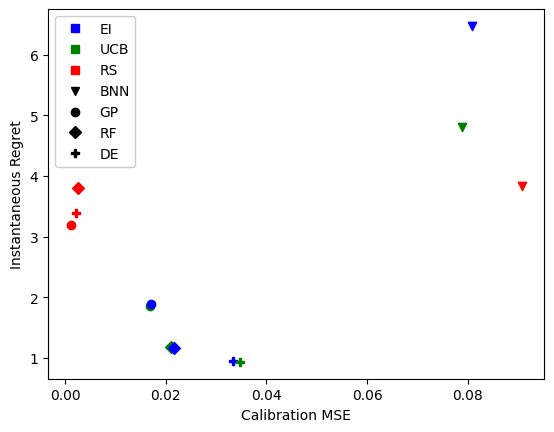

In [172]:
marker_dict = {'BNN':'v', 'GP': "o", 'RF':'D', 'DE':'P'}
color_dict = {'EI':'b', 'UCB':'g', 'RS':'r'}
for index, row in df.iterrows():
    plt.scatter(row['calibration_mse'], row['tot_regret_pool'], marker=marker_dict[row['surrogate']], color=color_dict[row['acquisition']])

    
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", list(color_dict.values())[i]) for i in range(3)]
handles += [f(list(marker_dict.values())[i], "k") for i in range(4)]
labels = list(color_dict.keys()) + ['BNN', 'GP', 'RF', 'DE']

plt.legend(handles, labels, loc=2, framealpha=1)
plt.xlabel('Calibration MSE')
plt.ylabel('Instantaneous Regret')
plt.show()

In [175]:
#TODO: Calculate new sample distance to nearest in training data at every BO iteration.
#TODO: Make ranking. Rank four surrogate models for one specific seed, dataset and acquistion function.
print(len([[0.85216802945564], [0.9796499778609811], [1.7319457048592344], [1.3013670289165014], [2.6143284981069916], [1.6910675460981386], [1.1054294645425786], [1.6713345438251763], [1.2594462877514772], [1.4664952414005414], [1.8491430217748834], [1.5589459519758067], [1.4343461830747533], [1.1559642191441728], [1.3058856081035617], [0.9798185160879221], [1.3487392094452473], [1.147530457993135], [1.2109971509841404], [0.978419828645433], [1.046736991541116], [2.058772199512438], [1.0873440361036426], [0.697252708791025], [0.6957823352371522], [1.3394479037424936], [1.5496707980455158], [0.8549722777358603], [0.7800027853371898], [1.6744180536412845], [1.5767549710153015], [1.4589989930056246], [0.7789467415439548], [2.0371108974604972], [1.809532467026455], [1.2927557217621441], [1.1018294786930265], [0.7703045482111519], [1.956857982051085], [1.0873357914910455], [1.664820382767177], [1.3881243019042724], [2.005975090874568], [0.9138272732097178], [1.388651682050511], [0.9234915091057267], [1.4265814383296849], [0.8521680294556402], [0.6943258410252555], [2.1242217255186002], [0.695782335237152], [0.7687511355120255], [0.48990925804396096], [0.6972655658421145], [1.1035450546825836], [1.2105287805388734], [1.0403562456505935], [1.8633645109961772], [1.2927557217621435], [0.7786886818526499], [1.5102814427510962], [1.2446067927270115], [1.0403303944834499], [0.8481439912189138], [1.048898015517321], [1.1502072272725568], [0.4874631190904859], [0.6940621509521361], [0.7687511355120255], [1.5003069908551316], [0.7771520279852959], [1.2927765252845786], [0.9798551127792042], [0.6032713022279209], [0.7771404925809462], [0.7703161859830611], [0.8561974058476766], [1.0973360020429561], [0.48746311909048595], [1.209162945661001], [0.6015712611182606], [0.7727374418365522], [0.6972655658421144], [0.6989778665686657], [1.7714170220601826], [0.8445136968549881], [0.853805072593619], [0.9196000225419176], [1.1035450546825836], [1.4583049671035175], [0.985238189603771], [0.9171832591837789], [0.8457221754695909], [1.588617215738164], [0.4899092580439613], [1.2518301173006279], [0.8524038440450842], [1.3356194358418028], [0.6052643902694366], [0.9838227516562361], [0.6940621509521361]]))

101


In [186]:
import json
import os
import numpy as np
import pandas as pd
import copy
surrogates = ['BNN', 'RF', 'GP', 'DE']
betas = [0.2, 0.5, 1, 2]
exp_dict = {'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
results_dict = {surrogate:{beta:copy.deepcopy(exp_dict) for beta in betas} for surrogate in surrogates}
directory="./results_mnist"
for foldername in os.listdir(directory):
    folder = os.path.join(directory, foldername)
    if os.path.isdir(folder):
        for filename in os.listdir(folder):
            if filename.find("parameters") != -1:
                json_file = open(os.path.join(folder, filename))
                params = json.load(json_file)
            elif filename.find("metrics") != -1:
                json_file = open(os.path.join(folder, filename))
                metrics = json.load(json_file)
        if params['bo'] == True and params['acquisition'] == "UCB":
            #results_dict[params['surrogate']][params['beta'].append(params['beta'])
            results_dict[params['surrogate']][params['beta']]['inst_regret_test'].append(metrics['y_regret_test'])
            results_dict[params['surrogate']][params['beta']]['inst_regret_pool'].append(metrics['y_regret_pool'])
            results_dict[params['surrogate']][params['beta']]['tot_regret_test'].append(np.cumsum(metrics['y_regret_test']))
            results_dict[params['surrogate']][params['beta']]['tot_regret_pool'].append(np.cumsum(metrics['y_regret_pool']))
            results_dict[params['surrogate']][params['beta']]['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
            results_dict[params['surrogate']][params['beta']]['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
            results_dict[params['surrogate']][params['beta']]['calibration_mse'].append(metrics['y_calibration_mse'])
column_names = {'surrogate':[], 'beta':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for surrogate in surrogates:
    for beta in betas:
        result_dict = results_dict[surrogate][beta]
        column_names['surrogate'].append(surrogate)
        column_names['beta'].append(beta)
        column_names['inst_regret_test'].append(np.array(result_dict['inst_regret_test']).mean(axis=0)[-1])
        column_names['inst_regret_pool'].append(np.array(result_dict['inst_regret_pool']).mean(axis=0)[-1])
        column_names['tot_regret_test'].append(np.array(result_dict['tot_regret_test']).mean(axis=0)[-1])
        column_names['tot_regret_pool'].append(np.array(result_dict['tot_regret_pool']).mean(axis=0)[-1])
        column_names['calibration_mse'].append(np.array(result_dict['calibration_mse']).mean(axis=0)[-1])
        column_names['x_opt_dist_test'].append(np.array(result_dict['x_opt_dist_test']).mean(axis=0)[-1])
        column_names['x_opt_dist_pool'].append(np.array(result_dict['x_opt_dist_pool']).mean(axis=0)[-1])    
df = pd.DataFrame.from_dict(column_names)
df = df.sort_values('surrogate')
display(df)

,surrogate,beta,inst_regret_test,inst_regret_pool,tot_regret_test,tot_regret_pool,calibration_mse,x_opt_dist_test,x_opt_dist_pool
0,BNN,0.2,0.007725,0.005972,2.125334,1.948328,0.082000,2.610578,1.465124
1,BNN,0.5,0.018279,0.016526,3.765185,3.588179,0.084382,2.482619,1.386001
2,BNN,1.0,0.020169,0.018417,4.204603,4.027596,0.087504,2.398777,1.964965
3,BNN,2.0,0.041613,0.039861,4.933865,4.756858,0.087742,2.149339,2.489028
12,DE,0.2,0.004871,0.002879,1.232042,1.046420,0.025807,1.574652,0.583225
13,DE,0.5,0.002905,0.000913,1.101782,0.905631,0.019836,1.689658,0.154833
14,DE,1.0,0.001992,0.000000,1.017875,0.835843,0.022918,1.662880,0.000000
15,DE,2.0,0.002351,0.000598,1.186640,1.009634,0.019778,1.944907,0.616496
8,GP,0.2,0.005113,0.003360,1.925475,1.748468,0.023740,1.963147,1.582238
9,GP,0.5,0.003876,0.001884,1.660606,1.470916,0.022845,1.773306,1.007527


In [6]:
#Instantaneous regret of pool rankings from real_data with recalibrated uncertanties.
import json
import os
import numpy as np
import pandas as pd
import copy
exp_dict = {'surrogate': [], 'acquisition': [], 'seed':[], 'data':[], 'dist_nearest_train':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
main_directory="./results_real_data/"
subdirectories = ['results_FashionMNIST_recalibrator/', "results_FashionMNIST_CNN_recalibrator/", 'results_mnist_recalibrator/', 'results_MNIST_CNN_recalibrator/', 'results_News_recalibrator/', 'results_SVM_recalibrator/']
for subdirectory in subdirectories:
    full_path = os.path.join(main_directory, subdirectory)
    for foldername in os.listdir(full_path):
        folder = os.path.join(full_path, foldername)
        if os.path.isdir(folder):
            for filename in os.listdir(folder):
                if filename.find("parameters") != -1:
                    json_file = open(os.path.join(folder, filename))
                    params = json.load(json_file)
                elif filename.find("metrics") != -1:
                    json_file = open(os.path.join(folder, filename))
                    metrics = json.load(json_file)
            if params['bo'] == True:
                exp_dict['surrogate'].append(params['surrogate'])
                exp_dict['acquisition'].append(params['acquisition'])
                exp_dict['data'].append(params['data_name'])
                exp_dict['dist_nearest_train'].append(metrics['next_sample_train_distance'])
                exp_dict['inst_regret_test'].append(metrics['y_regret_test'])
                exp_dict['inst_regret_pool'].append(metrics['y_regret_pool'])
                exp_dict['tot_regret_test'].append(np.cumsum(metrics['y_regret_test']))
                exp_dict['tot_regret_pool'].append(np.cumsum(metrics['y_regret_pool']))
                exp_dict['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
                exp_dict['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
                exp_dict['sharpness'].append(metrics['mean_sharpness'])
                exp_dict['calibration_mse'].append(metrics['y_calibration_mse'])
                exp_dict['seed'].append(params['seed'])
df = pd.DataFrame.from_dict(exp_dict)
processed_results = {'surrogate': [], 'acquisition': [], 'seed':[], 'data':[], 'dist_nearest_train_mean':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for index, row in df.iterrows():
    processed_results['surrogate'].append(row['surrogate'])
    processed_results['acquisition'].append(row['acquisition'])
    processed_results['data'].append(row['data'])
    processed_results['seed'].append(row['seed'])
    processed_results['dist_nearest_train_mean'].append(np.array(row['dist_nearest_train']).mean()) #Mean across one BO run.
    processed_results['inst_regret_pool'].append(np.array(row['inst_regret_pool'])[-1]) #Last iter.
    processed_results['inst_regret_test'].append(np.array(row['inst_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_test'].append(np.array(row['tot_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_pool'].append(np.array(row['tot_regret_pool'])[-1]) #Last iter.
    processed_results['calibration_mse'].append(np.array(row['calibration_mse']).mean()) #Mean Calibration MSE over run.
    processed_results['sharpness'].append(np.array(row['sharpness']).mean()) #Mean sharpness over run.
    processed_results['x_opt_dist_test'].append(np.array(row['x_opt_dist_test'])[-1])
    processed_results['x_opt_dist_pool'].append(np.array(row['x_opt_dist_pool'])[-1])
#Same seed and same dataset are ranked together.
df = pd.DataFrame.from_dict(processed_results)
seeds = np.arange(5)+1
datasets = ['fashionmnist', 'fashionmnist_cnn', 'mnist', 'mnist_cnn', 'news', 'svm_wine']
for seed in seeds:
    for dataset in datasets:
        #For one problem and one seed, we get a ranking going from 1-16 (depending on ties) since there are 4 surrogates and 4 acqs.
        selection = df.loc[(df['data']==dataset) & (df['seed']==seed)]
        df.loc[((df['data']==dataset) & (df['seed']==seed)),'min_rank'] = selection['inst_regret_pool'].rank(method="min")
acqs = ['UCB', 'TS', 'EI', 'RS']
surrogates = ['BNN', 'DE', 'GP', 'RF']
ranking_dict  = {'Acq':[], 'Surrogate':[], 'Rank':[]}
for acq in acqs:
    for surrogate in surrogates:
        ranking_dict['Rank'].append(df.loc[((df['acquisition']==acq) & (df['surrogate']==surrogate)),'min_rank'].mean())
        ranking_dict['Acq'].append(acq)
        ranking_dict['Surrogate'].append(surrogate)
display(pd.DataFrame.from_dict(ranking_dict).sort_values('Rank'))

,Acq,Surrogate,Rank
1,UCB,DE,2.733333
9,EI,DE,2.866667
3,UCB,RF,2.966667
11,EI,RF,3.000000
2,UCB,GP,4.633333
6,TS,GP,4.900000
10,EI,GP,5.133333
5,TS,DE,6.633333
13,RS,DE,8.033333
15,RS,RF,8.933333


In [7]:
#Instantaneous regret of pool rankings from real_data with vanilla uncertanties.
import json
import os
import numpy as np
import pandas as pd
import copy
exp_dict = {'surrogate': [], 'acquisition': [], 'seed':[], 'data':[], 'dist_nearest_train':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
main_directory="./results_real_data/"
subdirectories = ['results_FashionMNIST/', "results_FashionMNIST_CNN/", 'results_mnist/', 'results_MNIST_CNN/', 'results_News/', 'results_SVM/']
for subdirectory in subdirectories:
    full_path = os.path.join(main_directory, subdirectory)
    for foldername in os.listdir(full_path):
        folder = os.path.join(full_path, foldername)
        if os.path.isdir(folder):
            for filename in os.listdir(folder):
                if filename.find("parameters") != -1:
                    json_file = open(os.path.join(folder, filename))
                    params = json.load(json_file)
                elif filename.find("metrics") != -1:
                    json_file = open(os.path.join(folder, filename))
                    metrics = json.load(json_file)
            if params['bo'] == True:
                exp_dict['surrogate'].append(params['surrogate'])
                exp_dict['acquisition'].append(params['acquisition'])
                exp_dict['data'].append(params['data_name'])
                exp_dict['dist_nearest_train'].append(metrics['next_sample_train_distance'])
                exp_dict['inst_regret_test'].append(metrics['y_regret_test'])
                exp_dict['inst_regret_pool'].append(metrics['y_regret_pool'])
                exp_dict['tot_regret_test'].append(np.cumsum(metrics['y_regret_test']))
                exp_dict['tot_regret_pool'].append(np.cumsum(metrics['y_regret_pool']))
                exp_dict['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
                exp_dict['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
                exp_dict['sharpness'].append(metrics['mean_sharpness'])
                exp_dict['calibration_mse'].append(metrics['y_calibration_mse'])
                exp_dict['seed'].append(params['seed'])
df = pd.DataFrame.from_dict(exp_dict)
processed_results = {'surrogate': [], 'acquisition': [], 'seed':[], 'data':[], 'dist_nearest_train_mean':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for index, row in df.iterrows():
    processed_results['surrogate'].append(row['surrogate'])
    processed_results['acquisition'].append(row['acquisition'])
    processed_results['data'].append(row['data'])
    processed_results['seed'].append(row['seed'])
    processed_results['dist_nearest_train_mean'].append(np.array(row['dist_nearest_train']).mean()) #Mean across one BO run.
    processed_results['inst_regret_pool'].append(np.array(row['inst_regret_pool'])[-1]) #Last iter.
    processed_results['inst_regret_test'].append(np.array(row['inst_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_test'].append(np.array(row['tot_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_pool'].append(np.array(row['tot_regret_pool'])[-1]) #Last iter.
    processed_results['calibration_mse'].append(np.array(row['calibration_mse']).mean()) #Mean Calibration MSE over run.
    processed_results['sharpness'].append(np.array(row['sharpness']).mean()) #Mean sharpness over run.
    processed_results['x_opt_dist_test'].append(np.array(row['x_opt_dist_test'])[-1])
    processed_results['x_opt_dist_pool'].append(np.array(row['x_opt_dist_pool'])[-1])
#Same seed and same dataset are ranked together.
df = pd.DataFrame.from_dict(processed_results)
seeds = np.arange(99)+1
datasets = ['fashionmnist', 'fashionmnist_cnn', 'mnist', 'mnist_cnn', 'news', 'svm_wine']
for seed in seeds:
    for dataset in datasets:
        #For one problem and one seed, we get a ranking going from 1-16 (depending on ties) since there are 4 surrogates and 4 acqs.
        selection = df.loc[(df['data']==dataset) & (df['seed']==seed)]
        df.loc[((df['data']==dataset) & (df['seed']==seed)),'min_rank'] = selection['inst_regret_pool'].rank(method="min")
acqs = ['UCB', 'TS', 'EI', 'RS']
surrogates = ['BNN', 'DE', 'GP', 'RF']
ranking_dict  = {'Acq':[], 'Surrogate':[], 'Rank':[]}
for acq in acqs:
    for surrogate in surrogates:
        ranking_dict['Rank'].append(df.loc[((df['acquisition']==acq) & (df['surrogate']==surrogate)),'min_rank'].mean())
        ranking_dict['Acq'].append(acq)
        ranking_dict['Surrogate'].append(surrogate)
display(pd.DataFrame.from_dict(ranking_dict).sort_values('Rank'))

,Acq,Surrogate,Rank
1,UCB,DE,2.205387
9,EI,DE,2.260943
5,TS,DE,2.735690
7,TS,RF,2.863636
2,UCB,GP,4.013468
10,EI,GP,4.451178
11,EI,RF,5.419192
3,UCB,RF,5.484848
6,TS,GP,5.747475
0,UCB,BNN,7.740741


In [8]:
#Metrics at final iteration of real_data experiment with standard error of the mean reported in separate DataFrame.
import json
import os
import numpy as np
import pandas as pd
import copy
exp_dict = {'surrogate': [], 'acquisition': [], 'seed':[], 'data':[], 'dist_nearest_train':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
main_directory="./results_real_data/"
subdirectories = ['results_FashionMNIST/', "results_FashionMNIST_CNN/", 'results_mnist/', 'results_MNIST_CNN/', 'results_News/', 'results_SVM/']
for subdirectory in subdirectories:
    full_path = os.path.join(main_directory, subdirectory)
    for foldername in os.listdir(full_path):
        folder = os.path.join(full_path, foldername)
        if os.path.isdir(folder):
            for filename in os.listdir(folder):
                if filename.find("parameters") != -1:
                    json_file = open(os.path.join(folder, filename))
                    params = json.load(json_file)
                elif filename.find("metrics") != -1:
                    json_file = open(os.path.join(folder, filename))
                    metrics = json.load(json_file)
            if params['bo'] == True:
                exp_dict['surrogate'].append(params['surrogate'])
                exp_dict['acquisition'].append(params['acquisition'])
                exp_dict['data'].append(params['data_name'])
                exp_dict['dist_nearest_train'].append(metrics['next_sample_train_distance'])
                exp_dict['inst_regret_test'].append(metrics['y_regret_test'])
                exp_dict['inst_regret_pool'].append(metrics['y_regret_pool'])
                exp_dict['tot_regret_test'].append(np.cumsum(metrics['y_regret_test']))
                exp_dict['tot_regret_pool'].append(np.cumsum(metrics['y_regret_pool']))
                exp_dict['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
                exp_dict['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
                exp_dict['sharpness'].append(metrics['mean_sharpness'])
                exp_dict['calibration_mse'].append(metrics['y_calibration_mse'])
                exp_dict['seed'].append(params['seed'])
df = pd.DataFrame.from_dict(exp_dict)
processed_results = {'surrogate': [], 'acquisition': [], 'seed':[], 'data':[], 'dist_nearest_train_mean':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for index, row in df.iterrows():
    processed_results['surrogate'].append(row['surrogate'])
    processed_results['acquisition'].append(row['acquisition'])
    processed_results['data'].append(row['data'])
    processed_results['seed'].append(row['seed'])
    processed_results['dist_nearest_train_mean'].append(np.array(row['dist_nearest_train']).mean()) #Mean across one BO run.
    processed_results['inst_regret_pool'].append(np.array(row['inst_regret_pool'])[-1]) #Last iter.
    processed_results['inst_regret_test'].append(np.array(row['inst_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_test'].append(np.array(row['tot_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_pool'].append(np.array(row['tot_regret_pool'])[-1]) #Last iter.
    processed_results['calibration_mse'].append(np.array(row['calibration_mse']).mean(axis=0)) #Mean Calibration MSE over run.
    processed_results['sharpness'].append(np.array(row['sharpness']).mean()) #Mean sharpness over run.
    processed_results['x_opt_dist_test'].append(np.array(row['x_opt_dist_test'])[-1])
    processed_results['x_opt_dist_pool'].append(np.array(row['x_opt_dist_pool'])[-1])
df = pd.DataFrame.from_dict(processed_results)
acqs = ['UCB', 'TS', 'EI', 'RS']
surrogates = ['BNN', 'DE', 'GP', 'RF']
seeds = 99
aggregated_processed_results = {'surrogate': [], 'acquisition': [], 'dist_nearest_train_mean':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for acq in acqs:
    for surrogate in surrogates:
        selection = df.loc[((df['acquisition']==acq) & (df['surrogate']==surrogate))]
        aggregated_processed_results['surrogate'].append(surrogate)
        aggregated_processed_results['acquisition'].append(acq)
        aggregated_processed_results['dist_nearest_train_mean'].append(np.mean(selection['dist_nearest_train_mean']))
        aggregated_processed_results['inst_regret_test'].append(np.mean(selection['inst_regret_test']))
        aggregated_processed_results['inst_regret_pool'].append(np.mean(selection['inst_regret_pool']))
        aggregated_processed_results['tot_regret_test'].append(np.mean(selection['tot_regret_test']))
        aggregated_processed_results['tot_regret_pool'].append(np.mean(selection['tot_regret_pool']))
        aggregated_processed_results['calibration_mse'].append(np.mean(selection['calibration_mse']))
        aggregated_processed_results['sharpness'].append(np.mean(selection['sharpness']))
        aggregated_processed_results['x_opt_dist_test'].append(np.mean(selection['x_opt_dist_test']))
        aggregated_processed_results['x_opt_dist_pool'].append(np.mean(selection['x_opt_dist_pool']))
df2 = pd.DataFrame.from_dict(aggregated_processed_results)
df2 = df2.sort_values('inst_regret_pool')
display(df2)
acqs = ['UCB', 'TS', 'EI', 'RS']
surrogates = ['BNN', 'DE', 'GP', 'RF']
aggregated_processed_results_std = {'surrogate': [], 'acquisition': [], 'dist_nearest_train_mean':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for acq in acqs:
    for surrogate in surrogates:
        selection = df.loc[((df['acquisition']==acq) & (df['surrogate']==surrogate))]
        aggregated_processed_results_std['surrogate'].append(surrogate)
        aggregated_processed_results_std['acquisition'].append(acq)
        aggregated_processed_results_std['dist_nearest_train_mean'].append(np.std(selection['dist_nearest_train_mean'])/np.sqrt(seeds))
        aggregated_processed_results_std['inst_regret_test'].append(np.std(selection['inst_regret_test'])/np.sqrt(seeds))
        aggregated_processed_results_std['inst_regret_pool'].append(np.std(selection['inst_regret_pool'])/np.sqrt(seeds))
        aggregated_processed_results_std['tot_regret_test'].append(np.std(selection['tot_regret_test'])/np.sqrt(seeds))
        aggregated_processed_results_std['tot_regret_pool'].append(np.std(selection['tot_regret_pool'])/np.sqrt(seeds))
        aggregated_processed_results_std['calibration_mse'].append(np.std(selection['calibration_mse'])/np.sqrt(seeds))
        aggregated_processed_results_std['sharpness'].append(np.std(selection['sharpness'])/np.sqrt(seeds))
        aggregated_processed_results_std['x_opt_dist_test'].append(np.std(selection['x_opt_dist_test'])/np.sqrt(seeds))
        aggregated_processed_results_std['x_opt_dist_pool'].append(np.std(selection['x_opt_dist_pool'])/np.sqrt(seeds))
#Same seed and same dataset are ranked together.
df = pd.DataFrame.from_dict(aggregated_processed_results_std)
df = df.sort_values('inst_regret_pool')
display(df)

,surrogate,acquisition,dist_nearest_train_mean,inst_regret_test,inst_regret_pool,tot_regret_test,tot_regret_pool,calibration_mse,sharpness,x_opt_dist_test,x_opt_dist_pool
9,DE,EI,0.735608,0.003510,0.001147,1.069865,0.907612,0.036479,-0.292877,1.773260,0.964370
1,DE,UCB,0.746360,0.003547,0.001220,1.080744,0.918378,0.037014,-0.286789,1.774084,0.916126
5,DE,TS,0.831609,0.003803,0.001632,1.189891,1.037580,0.036536,-0.252596,1.781125,1.075754
7,RF,TS,0.902959,0.003797,0.001741,1.436355,1.321771,0.010140,0.888867,1.754771,1.009665
2,GP,UCB,0.858249,0.004445,0.002641,1.628855,1.524514,0.014904,-0.529606,1.789162,1.284411
10,GP,EI,0.924548,0.004786,0.003076,1.646233,1.545796,0.015263,-0.545129,1.783500,1.367458
3,RF,UCB,0.862667,0.005356,0.004243,1.194338,1.100580,0.015616,0.923084,1.848321,1.547104
11,RF,EI,0.866540,0.005461,0.004269,1.192190,1.095306,0.014568,0.873947,1.784204,1.533454
6,GP,TS,0.936842,0.005937,0.004578,1.841756,1.759365,0.012485,-0.582317,1.780415,1.523541
0,BNN,UCB,1.022831,0.011812,0.010389,2.743519,2.637321,0.101380,1.045786,1.920689,1.764657


,surrogate,acquisition,dist_nearest_train_mean,inst_regret_test,inst_regret_pool,tot_regret_test,tot_regret_pool,calibration_mse,sharpness,x_opt_dist_test,x_opt_dist_pool
9,DE,EI,0.019069,0.000443,0.000300,0.115486,0.107678,0.002358,0.023710,0.098480,0.123392
1,DE,UCB,0.019246,0.000446,0.000339,0.115019,0.107633,0.002297,0.024001,0.096486,0.118929
5,DE,TS,0.022101,0.000475,0.000378,0.126511,0.120780,0.002301,0.024523,0.097967,0.123117
7,RF,TS,0.028439,0.000486,0.000394,0.127867,0.122707,0.000600,0.211595,0.092501,0.116124
2,GP,UCB,0.029518,0.000568,0.000487,0.143703,0.138067,0.000987,0.037861,0.092997,0.119322
10,GP,EI,0.031227,0.000572,0.000533,0.145160,0.139343,0.001031,0.037538,0.094036,0.115111
3,RF,UCB,0.031649,0.000658,0.000615,0.117398,0.112382,0.000960,0.192322,0.094563,0.108752
11,RF,EI,0.031932,0.000681,0.000632,0.119542,0.113402,0.000889,0.188000,0.091577,0.111549
6,GP,TS,0.023768,0.000700,0.000665,0.163155,0.158650,0.000849,0.042659,0.091926,0.106616
14,GP,RS,0.039103,0.001566,0.001546,0.247266,0.245474,0.000265,0.034217,0.089973,0.087768


In [1]:
#Instantaneous regret of pool rankings of surrogates alone.
import json
import os
import numpy as np
import pandas as pd
import copy
exp_dict = {'surrogate': [], 'acquisition': [], 'seed':[], 'data':[], 'dist_nearest_train':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
main_directory="./results_real_data/"
subdirectories = ['results_FashionMNIST/', "results_FashionMNIST_CNN/", 'results_mnist/', 'results_MNIST_CNN/', 'results_News/', 'results_SVM/']
for subdirectory in subdirectories:
    full_path = os.path.join(main_directory, subdirectory)
    for foldername in os.listdir(full_path):
        folder = os.path.join(full_path, foldername)
        if os.path.isdir(folder):
            for filename in os.listdir(folder):
                if filename.find("parameters") != -1:
                    json_file = open(os.path.join(folder, filename))
                    params = json.load(json_file)
                elif filename.find("metrics") != -1:
                    json_file = open(os.path.join(folder, filename))
                    metrics = json.load(json_file)
            if params['bo'] == True:
                exp_dict['surrogate'].append(params['surrogate'])
                exp_dict['acquisition'].append(params['acquisition'])
                exp_dict['data'].append(params['data_name'])
                exp_dict['dist_nearest_train'].append(metrics['next_sample_train_distance'])
                exp_dict['inst_regret_test'].append(metrics['y_regret_test'])
                exp_dict['inst_regret_pool'].append(metrics['y_regret_pool'])
                exp_dict['tot_regret_test'].append(np.cumsum(metrics['y_regret_test']))
                exp_dict['tot_regret_pool'].append(np.cumsum(metrics['y_regret_pool']))
                exp_dict['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
                exp_dict['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
                exp_dict['sharpness'].append(metrics['mean_sharpness'])
                exp_dict['calibration_mse'].append(metrics['y_calibration_mse'])
                exp_dict['seed'].append(params['seed'])
df = pd.DataFrame.from_dict(exp_dict)
processed_results = {'surrogate': [], 'acquisition': [], 'seed':[], 'data':[], 'dist_nearest_train_mean':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for index, row in df.iterrows():
    processed_results['surrogate'].append(row['surrogate'])
    processed_results['acquisition'].append(row['acquisition'])
    processed_results['data'].append(row['data'])
    processed_results['seed'].append(row['seed'])
    processed_results['dist_nearest_train_mean'].append(np.array(row['dist_nearest_train']).mean()) #Mean across one BO run.
    processed_results['inst_regret_pool'].append(np.array(row['inst_regret_pool'])[-1]) #Last iter.
    processed_results['inst_regret_test'].append(np.array(row['inst_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_test'].append(np.array(row['tot_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_pool'].append(np.array(row['tot_regret_pool'])[-1]) #Last iter.
    processed_results['calibration_mse'].append(np.array(row['calibration_mse']).mean()) #Mean Calibration MSE over run.
    processed_results['sharpness'].append(np.array(row['sharpness']).mean()) #Mean sharpness over run.
    processed_results['x_opt_dist_test'].append(np.array(row['x_opt_dist_test'])[-1])
    processed_results['x_opt_dist_pool'].append(np.array(row['x_opt_dist_pool'])[-1])
#Same seed and same dataset are ranked together.
df = pd.DataFrame.from_dict(processed_results)
seeds = np.arange(99)+1
datasets = ['fashionmnist', 'fashionmnist_cnn', 'mnist', 'mnist_cnn', 'news', 'svm_wine']
acqs = ['UCB', 'TS', 'EI', 'RS']
for seed in seeds:
    for dataset in datasets:
        for acq in acqs:
            #For one problem and one seed, we get a ranking going from 1-16 (depending on ties) since there are 4 surrogates and 4 acqs.
            selection = df.loc[(df['data']==dataset) & (df['seed']==seed) & (df['acquisition']==acq)]
            df.loc[((df['data']==dataset) & (df['seed']==seed) & (df['acquisition']==acq)),'min_rank'] = selection['inst_regret_pool'].rank(method="min")
surrogates = ['BNN', 'DE', 'GP', 'RF']
ranking_dict  = {'Surrogate':[], 'Rank':[]}
for surrogate in surrogates:
    ranking_dict['Rank'].append(df.loc[((df['surrogate']==surrogate)),'min_rank'].mean())
    ranking_dict['Surrogate'].append(surrogate)
display(pd.DataFrame.from_dict(ranking_dict).sort_values('Rank'))

,Surrogate,Rank
1,DE,1.530303
3,RF,1.964646
2,GP,1.979377
0,BNN,2.843855


In [42]:
#Run synthetic experiments.
#Standard error of the mean på metrics.
#Papers on Thompson Sampling for GPs vs RFs.

In [52]:
#Metrics at final iteration of synth_data experiment with standard error of the mean reported in separate DataFrame.
import json
import os
import numpy as np
import pandas as pd
import copy
exp_dict = {'surrogate': [], 'acquisition': [], 'seed':[], 'data':[], 'dist_nearest_train':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
main_directory="./results_synth_data/"
for foldername in os.listdir(main_directory):
    folder = os.path.join(main_directory, foldername)
    if os.path.isdir(folder):
        for filename in os.listdir(folder):
            if filename.find("parameters") != -1:
                json_file = open(os.path.join(folder, filename))
                params = json.load(json_file)
            elif filename.find("metrics") != -1:
                json_file = open(os.path.join(folder, filename))
                metrics = json.load(json_file)
        if params['bo'] == True:
            exp_dict['surrogate'].append(params['surrogate'])
            exp_dict['acquisition'].append(params['acquisition'])
            exp_dict['data'].append(params['data_name'])
            exp_dict['dist_nearest_train'].append(metrics['next_sample_train_distance'])
            exp_dict['inst_regret_test'].append(metrics['f_regret_test'])
            exp_dict['inst_regret_pool'].append(metrics['f_regret_pool'])
            exp_dict['tot_regret_test'].append(np.cumsum(metrics['f_regret_test']))
            exp_dict['tot_regret_pool'].append(np.cumsum(metrics['f_regret_pool']))
            exp_dict['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
            exp_dict['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
            exp_dict['sharpness'].append(metrics['mean_sharpness'])
            exp_dict['calibration_mse'].append(metrics['y_calibration_mse'])
            exp_dict['seed'].append(params['seed'])
df = pd.DataFrame.from_dict(exp_dict)
processed_results = {'surrogate': [], 'acquisition': [], 'seed':[], 'data':[], 'dist_nearest_train_mean':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for index, row in df.iterrows():
    processed_results['surrogate'].append(row['surrogate'])
    processed_results['acquisition'].append(row['acquisition'])
    processed_results['data'].append(row['data'])
    processed_results['seed'].append(row['seed'])
    processed_results['dist_nearest_train_mean'].append(np.array(row['dist_nearest_train']).mean()) #Mean across one BO run.
    processed_results['inst_regret_pool'].append(np.array(row['inst_regret_pool'])[-1]) #Last iter.
    processed_results['inst_regret_test'].append(np.array(row['inst_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_test'].append(np.array(row['tot_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_pool'].append(np.array(row['tot_regret_pool'])[-1]) #Last iter.
    processed_results['calibration_mse'].append(np.array(row['calibration_mse']).mean(axis=0)) #Mean Calibration MSE over run.
    processed_results['sharpness'].append(np.array(row['sharpness']).mean()) #Mean sharpness over run.
    processed_results['x_opt_dist_test'].append(np.array(row['x_opt_dist_test'])[-1])
    processed_results['x_opt_dist_pool'].append(np.array(row['x_opt_dist_pool'])[-1])
df = pd.DataFrame.from_dict(processed_results)
acqs = ['UCB', 'TS', 'EI', 'RS']
surrogates = ['BNN', 'DE', 'GP', 'RF']
seeds = 99
aggregated_processed_results = {'surrogate': [], 'acquisition': [], 'dist_nearest_train_mean':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for acq in acqs:
    for surrogate in surrogates:
        selection = df.loc[((df['acquisition']==acq) & (df['surrogate']==surrogate))]
        aggregated_processed_results['surrogate'].append(surrogate)
        aggregated_processed_results['acquisition'].append(acq)
        aggregated_processed_results['dist_nearest_train_mean'].append(np.mean(selection['dist_nearest_train_mean']))
        aggregated_processed_results['inst_regret_test'].append(np.mean(selection['inst_regret_test']))
        aggregated_processed_results['inst_regret_pool'].append(np.mean(selection['inst_regret_pool']))
        aggregated_processed_results['tot_regret_test'].append(np.mean(selection['tot_regret_test']))
        aggregated_processed_results['tot_regret_pool'].append(np.mean(selection['tot_regret_pool']))
        aggregated_processed_results['calibration_mse'].append(np.mean(selection['calibration_mse']))
        aggregated_processed_results['sharpness'].append(np.mean(selection['sharpness']))
        aggregated_processed_results['x_opt_dist_test'].append(np.mean(selection['x_opt_dist_test']))
        aggregated_processed_results['x_opt_dist_pool'].append(np.mean(selection['x_opt_dist_pool']))
df2 = pd.DataFrame.from_dict(aggregated_processed_results)
df2 = df2.sort_values('inst_regret_pool')
display(df2)
acqs = ['UCB', 'TS', 'EI', 'RS']
surrogates = ['BNN', 'DE', 'GP', 'RF']
aggregated_processed_results_std = {'surrogate': [], 'acquisition': [], 'dist_nearest_train_mean':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for acq in acqs:
    for surrogate in surrogates:
        selection = df.loc[((df['acquisition']==acq) & (df['surrogate']==surrogate))]
        aggregated_processed_results_std['surrogate'].append(surrogate)
        aggregated_processed_results_std['acquisition'].append(acq)
        aggregated_processed_results_std['dist_nearest_train_mean'].append(np.std(selection['dist_nearest_train_mean'])/np.sqrt(seeds))
        aggregated_processed_results_std['inst_regret_test'].append(np.std(selection['inst_regret_test'])/np.sqrt(seeds))
        aggregated_processed_results_std['inst_regret_pool'].append(np.std(selection['inst_regret_pool'])/np.sqrt(seeds))
        aggregated_processed_results_std['tot_regret_test'].append(np.std(selection['tot_regret_test'])/np.sqrt(seeds))
        aggregated_processed_results_std['tot_regret_pool'].append(np.std(selection['tot_regret_pool'])/np.sqrt(seeds))
        aggregated_processed_results_std['calibration_mse'].append(np.std(selection['calibration_mse'])/np.sqrt(seeds))
        aggregated_processed_results_std['sharpness'].append(np.std(selection['sharpness'])/np.sqrt(seeds))
        aggregated_processed_results_std['x_opt_dist_test'].append(np.std(selection['x_opt_dist_test'])/np.sqrt(seeds))
        aggregated_processed_results_std['x_opt_dist_pool'].append(np.std(selection['x_opt_dist_pool'])/np.sqrt(seeds))
#Same seed and same dataset are ranked together.
df = pd.DataFrame.from_dict(aggregated_processed_results_std)
df = df.sort_values('inst_regret_pool')
display(df)

,surrogate,acquisition,dist_nearest_train_mean,inst_regret_test,inst_regret_pool,tot_regret_test,tot_regret_pool,calibration_mse,sharpness,x_opt_dist_test,x_opt_dist_pool
2,GP,UCB,0.802572,0.146148,0.029479,21.926112,11.797176,0.017731,-0.364803,1.528918,0.641151
10,GP,EI,1.153731,0.147055,0.030331,21.426844,11.058687,0.017027,-0.301464,1.588313,0.685210
9,DE,EI,0.963842,0.154234,0.040652,29.090840,20.801825,0.030715,-0.378963,1.608701,0.860884
5,DE,TS,0.994144,0.153996,0.041751,29.528736,21.157625,0.028561,-0.363112,1.584890,0.891726
6,GP,TS,1.037890,0.161805,0.045383,38.141138,30.318247,0.009847,-0.481535,1.596132,0.778285
1,DE,UCB,0.932209,0.156758,0.046666,28.865475,20.493528,0.029794,-0.399292,1.612486,0.920664
3,RF,UCB,1.039217,0.182220,0.076547,36.897073,30.881769,0.025258,-0.389793,1.622044,1.206396
11,RF,EI,1.082921,0.198535,0.105573,39.568599,34.717738,0.024385,-0.385502,1.645271,1.348865
7,RF,TS,1.236687,0.329111,0.303249,55.699297,53.852967,0.012501,-0.446860,1.690973,1.588226
0,BNN,UCB,1.202356,0.474158,0.427622,63.102326,59.712532,0.103321,0.839903,1.899033,1.649999


,surrogate,acquisition,dist_nearest_train_mean,inst_regret_test,inst_regret_pool,tot_regret_test,tot_regret_pool,calibration_mse,sharpness,x_opt_dist_test,x_opt_dist_pool
10,GP,EI,0.071006,0.038091,0.004946,4.614184,1.657328,0.001540,0.063524,0.138771,0.115872
2,GP,UCB,0.060304,0.038120,0.005022,4.777725,1.974661,0.001809,0.065027,0.136044,0.116612
9,DE,EI,0.072843,0.039019,0.011327,5.397064,3.185947,0.003169,0.049300,0.138775,0.144192
5,DE,TS,0.074607,0.039095,0.011820,5.407602,3.168870,0.002738,0.048478,0.134350,0.144248
1,DE,UCB,0.070813,0.039262,0.012897,5.404013,3.212026,0.003041,0.050929,0.138801,0.155027
3,RF,UCB,0.072955,0.042907,0.020076,7.138876,5.796626,0.001841,0.085323,0.132010,0.154606
6,GP,TS,0.080978,0.046584,0.023892,8.303307,6.589152,0.000949,0.058989,0.136940,0.127254
11,RF,EI,0.075136,0.048399,0.028823,8.022790,6.788635,0.001755,0.082658,0.132777,0.155677
7,RF,TS,0.083435,0.079445,0.074548,11.313991,10.702940,0.000931,0.076372,0.134354,0.145385
0,BNN,UCB,0.084850,0.087058,0.088271,10.830463,10.738128,0.005445,0.033730,0.131128,0.148726


In [49]:
#Metrics at final iteration of synth_data experiment with standard error of the mean reported in separate DataFrame.
import json
import os
import numpy as np
import pandas as pd
import copy
exp_dict = {'surrogate': [], 'acquisition': [], 'seed':[], 'problem_idx':[], 'dim':[], 'dist_nearest_train':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
main_directory="./results_synth_data/"
for foldername in os.listdir(main_directory):
    folder = os.path.join(main_directory, foldername)
    if os.path.isdir(folder):
        for filename in os.listdir(folder):
            if filename.find("parameters") != -1:
                json_file = open(os.path.join(folder, filename))
                params = json.load(json_file)
            elif filename.find("metrics") != -1:
                json_file = open(os.path.join(folder, filename))
                metrics = json.load(json_file)
        if params['bo'] == True:
            exp_dict['surrogate'].append(params['surrogate'])
            exp_dict['acquisition'].append(params['acquisition'])
            exp_dict['problem_idx'].append(params['problem_idx'])
            exp_dict['dim'].append(params['d'])
            exp_dict['dist_nearest_train'].append(metrics['next_sample_train_distance'])
            exp_dict['inst_regret_test'].append(metrics['y_regret_test'])
            exp_dict['inst_regret_pool'].append(metrics['y_regret_pool'])
            exp_dict['tot_regret_test'].append(np.cumsum(metrics['y_regret_test']))
            exp_dict['tot_regret_pool'].append(np.cumsum(metrics['y_regret_pool']))
            exp_dict['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
            exp_dict['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
            exp_dict['sharpness'].append(metrics['mean_sharpness'])
            exp_dict['calibration_mse'].append(metrics['y_calibration_mse'])
            exp_dict['seed'].append(params['seed'])
df = pd.DataFrame.from_dict(exp_dict)
processed_results = {'surrogate': [], 'acquisition': [], 'seed':[], 'problem_idx':[], 'dim':[], 'dist_nearest_train_mean':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for index, row in df.iterrows():
    processed_results['surrogate'].append(row['surrogate'])
    processed_results['acquisition'].append(row['acquisition'])
    processed_results['problem_idx'].append(row['problem_idx'])
    processed_results['dim'].append(row['dim'])
    processed_results['seed'].append(row['seed'])
    processed_results['dist_nearest_train_mean'].append(np.array(row['dist_nearest_train']).mean()) #Mean across one BO run.
    processed_results['inst_regret_pool'].append(np.array(row['inst_regret_pool'])[-1]) #Last iter.
    processed_results['inst_regret_test'].append(np.array(row['inst_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_test'].append(np.array(row['tot_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_pool'].append(np.array(row['tot_regret_pool'])[-1]) #Last iter.
    processed_results['calibration_mse'].append(np.array(row['calibration_mse']).mean()) #Mean Calibration MSE over run.
    processed_results['sharpness'].append(np.array(row['sharpness']).mean()) #Mean sharpness over run.
    processed_results['x_opt_dist_test'].append(np.array(row['x_opt_dist_test'])[-1])
    processed_results['x_opt_dist_pool'].append(np.array(row['x_opt_dist_pool'])[-1])
df = pd.DataFrame.from_dict(processed_results)
acqs = ['UCB', 'TS', 'EI', 'RS']
surrogates = ['BNN', 'DE', 'GP', 'RF']
problem_idxs = np.arange(10)+1
seeds = 10
aggregated_processed_results = {'surrogate': [], 'acquisition': [], 'problem_idx': [], 'dist_nearest_train_mean':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for acq in acqs:
    for problem_idx in problem_idxs:
        for surrogate in surrogates:
            selection = df.loc[((df['acquisition']==acq) & (df['surrogate']==surrogate)& (df['problem_idx']==problem_idx))]
            aggregated_processed_results['surrogate'].append(surrogate)
            aggregated_processed_results['acquisition'].append(acq)
            aggregated_processed_results['problem_idx'].append(problem_idx)
            aggregated_processed_results['dist_nearest_train_mean'].append(np.mean(selection['dist_nearest_train_mean']))
            aggregated_processed_results['inst_regret_test'].append(np.mean(selection['inst_regret_test']))
            aggregated_processed_results['inst_regret_pool'].append(np.mean(selection['inst_regret_pool']))
            aggregated_processed_results['tot_regret_test'].append(np.mean(selection['tot_regret_test']))
            aggregated_processed_results['tot_regret_pool'].append(np.mean(selection['tot_regret_pool']))
            aggregated_processed_results['calibration_mse'].append(np.mean(selection['calibration_mse']))
            aggregated_processed_results['sharpness'].append(np.mean(selection['sharpness']))
            aggregated_processed_results['x_opt_dist_test'].append(np.mean(selection['x_opt_dist_test']))
            aggregated_processed_results['x_opt_dist_pool'].append(np.mean(selection['x_opt_dist_pool']))
df2 = pd.DataFrame.from_dict(aggregated_processed_results)
df2 = df2.sort_values('inst_regret_pool')
display(df2)
aggregated_processed_results_std = {'surrogate': [], 'acquisition': [], 'problem_idx': [], 'dist_nearest_train_mean':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for acq in acqs:
    for surrogate in surrogates:
        selection = df.loc[((df['acquisition']==acq) & (df['surrogate']==surrogate)& (df['problem_idx']==problem_idx))]
        aggregated_processed_results_std['surrogate'].append(surrogate)
        aggregated_processed_results_std['acquisition'].append(acq)
        aggregated_processed_results['problem_idx'].append(problem_idx)
        aggregated_processed_results_std['dist_nearest_train_mean'].append(np.std(selection['dist_nearest_train_mean'])/np.sqrt(seeds))
        aggregated_processed_results_std['inst_regret_test'].append(np.std(selection['inst_regret_test'])/np.sqrt(seeds))
        aggregated_processed_results_std['inst_regret_pool'].append(np.std(selection['inst_regret_pool'])/np.sqrt(seeds))
        aggregated_processed_results_std['tot_regret_test'].append(np.std(selection['tot_regret_test'])/np.sqrt(seeds))
        aggregated_processed_results_std['tot_regret_pool'].append(np.std(selection['tot_regret_pool'])/np.sqrt(seeds))
        aggregated_processed_results_std['calibration_mse'].append(np.std(selection['calibration_mse'])/np.sqrt(seeds))
        aggregated_processed_results_std['sharpness'].append(np.std(selection['sharpness'])/np.sqrt(seeds))
        aggregated_processed_results_std['x_opt_dist_test'].append(np.std(selection['x_opt_dist_test'])/np.sqrt(seeds))
        aggregated_processed_results_std['x_opt_dist_pool'].append(np.std(selection['x_opt_dist_pool'])/np.sqrt(seeds))
#Same seed and same dataset are ranked together.
df = pd.DataFrame.from_dict(aggregated_processed_results_std)
df = df.sort_values('inst_regret_pool')
display(df)

,surrogate,acquisition,problem_idx,dist_nearest_train_mean,inst_regret_test,inst_regret_pool,tot_regret_test,tot_regret_pool,calibration_mse,sharpness,x_opt_dist_test,x_opt_dist_pool
18,GP,UCB,5,0.760505,0.194974,0.008799,32.015221,15.898640,0.013035,-0.526292,1.202951,0.139408
26,GP,UCB,7,0.806685,0.103903,0.009242,16.105789,9.441714,0.011064,-0.312176,1.397290,0.324058
17,DE,UCB,5,0.858026,0.196411,0.013127,40.310023,27.730798,0.015721,-0.519250,1.240467,0.199844
58,GP,TS,5,0.951921,0.197318,0.014596,49.547582,37.507174,0.007204,-0.500218,1.335132,0.165933
97,DE,EI,5,0.887361,0.199711,0.017003,41.177085,28.917780,0.016763,-0.493869,1.229873,0.247400
...,...,...,...,...,...,...,...,...,...,...,...,...
128,BNN,RS,3,1.326504,1.084053,1.048210,139.250707,136.035021,0.092682,1.239733,1.430291,1.464125
56,BNN,TS,5,1.311772,1.082946,1.050915,122.102813,119.577338,0.078833,0.969064,1.609469,1.600280
48,BNN,TS,3,1.311362,1.229774,1.178511,147.663297,143.590477,0.100086,0.978061,1.686355,1.585484
96,BNN,EI,5,1.325672,1.226082,1.191041,133.094686,131.065518,0.092761,0.575001,1.652024,1.472385


ValueError: All arrays must be of the same length

In [50]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    display(df2)

,surrogate,acquisition,problem_idx,dist_nearest_train_mean,inst_regret_test,inst_regret_pool,tot_regret_test,tot_regret_pool,calibration_mse,sharpness,x_opt_dist_test,x_opt_dist_pool
18,GP,UCB,5,0.761,0.195,0.009,32.015,15.899,0.013,-0.526,1.203,0.139
26,GP,UCB,7,0.807,0.104,0.009,16.106,9.442,0.011,-0.312,1.397,0.324
17,DE,UCB,5,0.858,0.196,0.013,40.310,27.731,0.016,-0.519,1.240,0.200
58,GP,TS,5,0.952,0.197,0.015,49.548,37.507,0.007,-0.500,1.335,0.166
97,DE,EI,5,0.887,0.200,0.017,41.177,28.918,0.017,-0.494,1.230,0.247
22,GP,UCB,6,0.797,0.123,0.017,24.558,15.272,0.018,-0.446,1.581,0.380
66,GP,TS,7,0.973,0.106,0.018,23.813,18.917,0.006,-0.368,1.451,0.399
98,GP,EI,5,1.138,0.199,0.019,30.359,14.299,0.014,-0.349,1.283,0.097
102,GP,EI,6,1.093,0.123,0.019,23.994,14.839,0.017,-0.303,1.634,0.388
57,DE,TS,5,0.905,0.200,0.020,41.451,28.908,0.015,-0.465,1.227,0.274


In [51]:
#Instantaneous regret of pool rankings of surrogates alone on synthetic data.
import json
import os
import numpy as np
import pandas as pd
import copy
exp_dict = {'surrogate': [], 'acquisition': [], 'seed':[], 'problem_idx':[], 'dim':[], 'dist_nearest_train':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
main_directory="./results_synth_data/"
for foldername in os.listdir(main_directory):
    folder = os.path.join(main_directory, foldername)
    if os.path.isdir(folder):
        for filename in os.listdir(folder):
            if filename.find("parameters") != -1:
                json_file = open(os.path.join(folder, filename))
                params = json.load(json_file)
            elif filename.find("metrics") != -1:
                json_file = open(os.path.join(folder, filename))
                metrics = json.load(json_file)
        if params['bo'] == True:
            exp_dict['surrogate'].append(params['surrogate'])
            exp_dict['acquisition'].append(params['acquisition'])
            exp_dict['problem_idx'].append(params['problem_idx'])
            exp_dict['dim'].append(params['d'])
            exp_dict['dist_nearest_train'].append(metrics['next_sample_train_distance'])
            exp_dict['inst_regret_test'].append(metrics['y_regret_test'])
            exp_dict['inst_regret_pool'].append(metrics['y_regret_pool'])
            exp_dict['tot_regret_test'].append(np.cumsum(metrics['y_regret_test']))
            exp_dict['tot_regret_pool'].append(np.cumsum(metrics['y_regret_pool']))
            exp_dict['x_opt_dist_pool'].append(metrics['x_y_opt_dist_pool'])
            exp_dict['x_opt_dist_test'].append(metrics['x_y_opt_dist_test'])
            exp_dict['sharpness'].append(metrics['mean_sharpness'])
            exp_dict['calibration_mse'].append(metrics['y_calibration_mse'])
            exp_dict['seed'].append(params['seed'])
df = pd.DataFrame.from_dict(exp_dict)
processed_results = {'surrogate': [], 'acquisition': [], 'seed':[], 'problem_idx':[], 'dim':[], 'dist_nearest_train_mean':[], 'inst_regret_test':[], 'inst_regret_pool':[], 'tot_regret_test':[], 'tot_regret_pool':[], 'calibration_mse':[], 'sharpness':[], 'x_opt_dist_test':[], 'x_opt_dist_pool':[]}
for index, row in df.iterrows():
    processed_results['surrogate'].append(row['surrogate'])
    processed_results['acquisition'].append(row['acquisition'])
    processed_results['problem_idx'].append(row['problem_idx'])
    processed_results['dim'].append(row['dim'])
    processed_results['seed'].append(row['seed'])
    processed_results['dist_nearest_train_mean'].append(np.array(row['dist_nearest_train']).mean()) #Mean across one BO run.
    processed_results['inst_regret_pool'].append(np.array(row['inst_regret_pool'])[-1]) #Last iter.
    processed_results['inst_regret_test'].append(np.array(row['inst_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_test'].append(np.array(row['tot_regret_test'])[-1]) #Last iter.
    processed_results['tot_regret_pool'].append(np.array(row['tot_regret_pool'])[-1]) #Last iter.
    processed_results['calibration_mse'].append(np.array(row['calibration_mse']).mean()) #Mean Calibration MSE over run.
    processed_results['sharpness'].append(np.array(row['sharpness']).mean()) #Mean sharpness over run.
    processed_results['x_opt_dist_test'].append(np.array(row['x_opt_dist_test'])[-1])
    processed_results['x_opt_dist_pool'].append(np.array(row['x_opt_dist_pool'])[-1])
#Same seed and same dataset are ranked together.
df = pd.DataFrame.from_dict(processed_results)
seeds = np.arange(10)+1
problem_idxs = np.arange(10)+1
acqs = ['UCB', 'TS', 'EI', 'RS']
dimensions = np.arange(10)+1
for seed in seeds:
    for d in dimensions:
        for problem_idx in problem_idxs:
            for acq in acqs:
                #For one problem and one seed, we get a ranking going from 1-16 (depending on ties) since there are 4 surrogates and 4 acqs.
                selection = df.loc[(df['problem_idx']==problem_idx) & (df['seed']==seed) & (df['acquisition']==acq) & (df['dim']==d)]
                df.loc[((df['problem_idx']==problem_idx) & (df['seed']==seed) & (df['acquisition']==acq) & (df['dim']==d)),'min_rank'] = selection['inst_regret_pool'].rank(method="min")
surrogates = ['BNN', 'DE', 'GP', 'RF']
ranking_dict  = {'Surrogate':[], 'Rank':[]}
for surrogate in surrogates:
    ranking_dict['Rank'].append(df.loc[((df['surrogate']==surrogate)),'min_rank'].mean())
    ranking_dict['Surrogate'].append(surrogate)
display(pd.DataFrame.from_dict(ranking_dict).sort_values('Rank'))

,Surrogate,Rank
2,GP,2.074167
1,DE,2.118333
3,RF,2.943333
0,BNN,4.348611


In [56]:
#ER STØJ FOR HØJ???
#Eksempler hvor f_opt er -2 for eksempel, men y_opt er -2.7 (y = f + støj)
#Syntetiske jobs - ændre dimensioner 2..10 step size 2
#20 seeds, 20 problemer.
import numpy as np
np.exp(np.linspace(np.log(0.01), np.log(100), 20))

array([1.00000000e-02, 1.62377674e-02, 2.63665090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02])